# Lecture 3. How to minimize cost

## Hypothesis and Cost

$$H(x) = Wx + b$$


$$cost(W, b) = \frac{1}{m} \sum^m_{i=1} ((H(x_i)-y_i)^2 $$


## SImplified hypothesis

$$H(x) = Wx$$


$$cost(W) = \frac{1}{m} \sum^m_{i=1} (Wx_i-y_i)^2 $$


## What $cost(W)$ looks like ?

| x | y |
|:--:--:|
| 1 | 1 |
| 2 | 2 |
| 3 | 3 |

$$cost(W) = \frac{1}{m} \sum^m_{i=1} (Wx_i-y_i)^2 $$

- if $W = 1$, $cost(W) = 0$
$$\frac{1}{3}(1 \times 1 - 1)^2 + (1 \times 2 - 2)^2 + (1 \times 3 - 3)^2 = 0$$

- if $W = 0$, $cost(W) = 4.67$
$$\frac{1}{3}(1 \times 1 - 1)^2 + (0 \times 2 - 2)^2 + (0 \times 3 - 3)^2 = 4.67$$

- if $W = 2$, $cost(W) = 4.67$
$$\frac{1}{3}(2 \times 1 - 1)^2 + (2 \times 2 - 2)^2 + (2 \times 3 - 3)^2 = 4.67$$

$$\vdots$$

## Gradient descent algorithm
- Minimize cost function
- Gradient descent is used many minimization problems
- For a given cost function, $cost(W, b)$, it will find $W, b$ to minimize cost
- It can be applied to more general function : $cost(w_1, w_2, \cdots)$

### How it works ?
- How would you find the lowest point ?

<img src="https://qph.ec.quoracdn.net/main-qimg-1ec77cdbb354c3b9d439fbe436dc5d4f", width=400>

- Start with initial guesses
 - Start at 0, 0 ( or any other value )
 - Keeping changing $W$ and $b$ a little bit to try and reduce $cost(W, b)$
- Each time you change the parameters, you select the gradient which reduces $cost(W, b)$ the most possible
- Repeat
- Do so until you converge to a local minimum
- Have an interesting property
 - Where you start can determine which minimum you end up

### Formal definition
- 미분시 계산 편리하게 하기 위해 분모를 $2m$ 으로 변경 ( 이렇게 해도 min point 찾는데는 지장 없음 )

$$cost(W) = \frac{1}{2m} \sum^m_{i=1} (Wx_i-y_i)^2 $$

- 현재 $W$ 값에 $\alpha \frac{\partial}{\partial W} cost(W)$ 을 뺀 것이 다음 $W$ 값

$$
\begin{align}
W :=& W - \alpha \frac{\partial}{\partial W} cost(W) \\
& \alpha : learning ~ rate \\
\end{align}
$$

- $W$ 로 $cost(W)$ 을 미분 **( Graident descent algorithm )**

$$
\begin{align}
W :=& W - \alpha \frac{\partial}{\partial W} \frac{1}{2m} \sum^m_{i=1} (Wx_i-y_i)^2 \\
W :=& W - \alpha \frac{1}{m} \sum^m_{i=1} (Wx_i-y_i) x_i \\
\end{align}
$$

## Convex function
- $cost(W, b)$ 의 모양이 Convex function 이 되어야 어느 지점에서 알고리즘을 시작하더라도 min point 가 일정하다.

# Lab 3. Minimizing Cost
---

## SImplified hypothesis

$$H(x) = Wx$$


$$cost(W) = \frac{1}{m} \sum^m_{i=1} (Wx_i-y_i)^2 $$

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

# tf Graph Input
X = [1., 2., 3.]
y = [1., 2., 3.]
m = n_samples = len(X)

# Set model weights
W = tf.placeholder(tf.float32)

# Construct a linear model
hypothesis = tf.mul(X, W)

# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis - y, 2))/(m)

In [2]:
# Initializing the variables
# init = tf.initialize_all_variables() # 없어질 예정
init = tf.global_variables_initializer()

# For graphs
W_val = []
cost_val = []

# Launch the graph
sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print(i*0.1, sess.run(cost, feed_dict={W: i*0.1}))
    W_val.append(i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))

-3.0 74.6667
-2.9000000000000004 70.98
-2.8000000000000003 67.3867
-2.7 63.8867
-2.6 60.48
-2.5 57.1667
-2.4000000000000004 53.9467
-2.3000000000000003 50.82
-2.2 47.7867
-2.1 44.8467
-2.0 42.0
-1.9000000000000001 39.2467
-1.8 36.5867
-1.7000000000000002 34.02
-1.6 31.5467
-1.5 29.1667
-1.4000000000000001 26.88
-1.3 24.6867
-1.2000000000000002 22.5867
-1.1 20.58
-1.0 18.6667
-0.9 16.8467
-0.8 15.12
-0.7000000000000001 13.4867
-0.6000000000000001 11.9467
-0.5 10.5
-0.4 9.14667
-0.30000000000000004 7.88667
-0.2 6.72
-0.1 5.64667
0.0 4.66667
0.1 3.78
0.2 2.98667
0.30000000000000004 2.28667
0.4 1.68
0.5 1.16667
0.6000000000000001 0.746667
0.7000000000000001 0.42
0.8 0.186667
0.9 0.0466667
1.0 0.0
1.1 0.0466667
1.2000000000000002 0.186667
1.3 0.42
1.4000000000000001 0.746666
1.5 1.16667
1.6 1.68
1.7000000000000002 2.28667
1.8 2.98667
1.9000000000000001 3.78
2.0 4.66667
2.1 5.64667
2.2 6.72
2.3000000000000003 7.88667
2.4000000000000004 9.14667
2.5 10.5
2.6 11.9467
2.7 13.4867
2.8000000000000

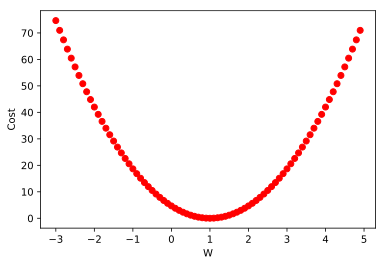

In [3]:
# Graphic display
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

## Graident descent algorithm

$$ W := W - \alpha \frac{1}{m} \sum^m_{i=1} (Wx_i-y_i) x_i $$

In [4]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hypothesis = W * X

cost = tf.reduce_mean(tf.square(hypothesis - y))

# Minimize
descent = W - tf.mul(0.1, tf.reduce_mean(tf.mul((tf.mul(W, X) - y), X)))
update = W.assign(descent)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(35):
    sess.run(update, feed_dict={X: x_data, y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, y: y_data}))

0 12.5094
1 3.55824
2 1.01212
3 0.287892
4 0.0818892
5 0.0232929
6 0.00662554
7 0.0018846
8 0.000536058
9 0.000152481
10 4.33714e-05
11 1.23361e-05
12 3.50892e-06
13 9.98055e-07
14 2.83947e-07
15 8.07397e-08
16 2.29762e-08
17 6.53862e-09
18 1.85824e-09
19 5.29948e-10
20 1.52795e-10
21 4.27616e-11
22 1.18957e-11
23 3.05533e-12
24 1.06108e-12
25 2.65269e-13
26 9.9476e-14
27 2.4869e-14
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
